<a href="https://colab.research.google.com/github/SANDRAJACOB1/Zomato-Restaurent-Data-Rating-Prediction/blob/main/Project_SANDRA_JACOB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

**MOUNTING DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOADING DATASET**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/zomato.csv')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
df=df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [ ]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [ ]:
#Checking for duplicates

df.duplicated().sum()

108

In [ ]:
#Dropping duplicates

df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [ ]:
df.nunique()

name                           8792
online_order                      2
book_table                        2
rate                             64
votes                          2328
location                         93
rest_type                        93
cuisines                       2723
approx_cost(for two people)      70
listed_in(type)                   7
listed_in(city)                  30
dtype: int64

In [ ]:
for i in df.columns:
  print(i,'\n',df[i].unique())

name 
 ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...']
online_order 
 ['Yes' 'No']
book_table 
 ['Yes' 'No']
rate 
 ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']
votes 
 [ 775  787  918 ... 4957 2382  843]
location 
 ['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Nagarbha

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#Cleanig rate column

#Removing '/5','NEW' and '-' from the rate column

# df_train_e['Mileage']=df_train_e['Mileage'].str.replace('km/kg','')
def handlerate(value):
  if(value=='NEW' or value=='-'):
    return np.nan
  else:
    value=str(value).split('/')[0]
    # value=value[0]
    return float(value)
df['rate']=df['rate'].apply(handlerate)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
df['rate'].isna().sum()

10019

In [ ]:
#Filling mising values in the column rate

df['rate'].fillna(df['rate'].mean(),inplace=True)
df['rate'].isna().sum()

0

In [ ]:
df.isna().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [ ]:
#Dropping Null values

df.dropna(inplace=True)
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [ ]:
#Renaming the column names for convenience

df.rename(columns={'approx_cost(for two people)':'Cost2plates','listed_in(type)':'Type'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [ ]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [ ]:
df.drop(['listed_in(city)'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
def handlecomma(value):
  value=str(value)
  if ',' in value:
    value=value.replace(',','')
    return float(value)
  else:
    return float(value)
df['Cost2plates']=df['Cost2plates'].apply(handlecomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [ ]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [ ]:
rest_types=df['rest_type'].value_counts(ascending=True)
rest_types

rest_type
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Cafe, Food Court                  2
                              ...  
Dessert Parlor                 2242
Delivery                       2574
Cafe                           3682
Casual Dining                 10253
Quick Bites                   19010
Name: count, Length: 93, dtype: int64

In [ ]:
rest_types_lessthan1000=rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Dessert Parlor, Food Court      2
Food Court, Beverage Shop       2
Cafe, Food Court                2
                             ... 
Bar, Casual Dining            411
Sweet Shop                    468
Food Court                    616
Bar                           686
Beverage Shop                 863
Name: count, Length: 85, dtype: int64

In [ ]:
def handle_rest_type(value):
  if(value in rest_types_lessthan1000):
    return 'Others'
  else:
    return value
df['rest_type']=df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
Others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [ ]:
df['location'].value_counts()

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [ ]:
location=df['location'].value_counts(ascending=True)
#location
location_lessthan300=location[location<300]
#location_lessthan300
def handle_location(value):
  if(value in location_lessthan300):
    return 'Others'
  else:
    return value

df['location']=df['location'].apply(handle_location)
df['location'].value_counts()

location
BTM                      5056
Others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [ ]:
df['cuisines'].value_counts()

cuisines
North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2704, dtype: int64

In [ ]:
cuisines=df['cuisines'].value_counts(ascending=False)
#cuisines
cuisines_lessthan100=cuisines[cuisines<100]
#cuisines_lessthan100

def handle_cuisines(value):
  if(value in cuisines_lessthan100):
    return 'Others'
  else:
    return value

df['cuisines']=df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
Others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [ ]:
df['Type'].value_counts()

Type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

<ipython-input-204-b9cacbcff554>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['location'],palette='crest')


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

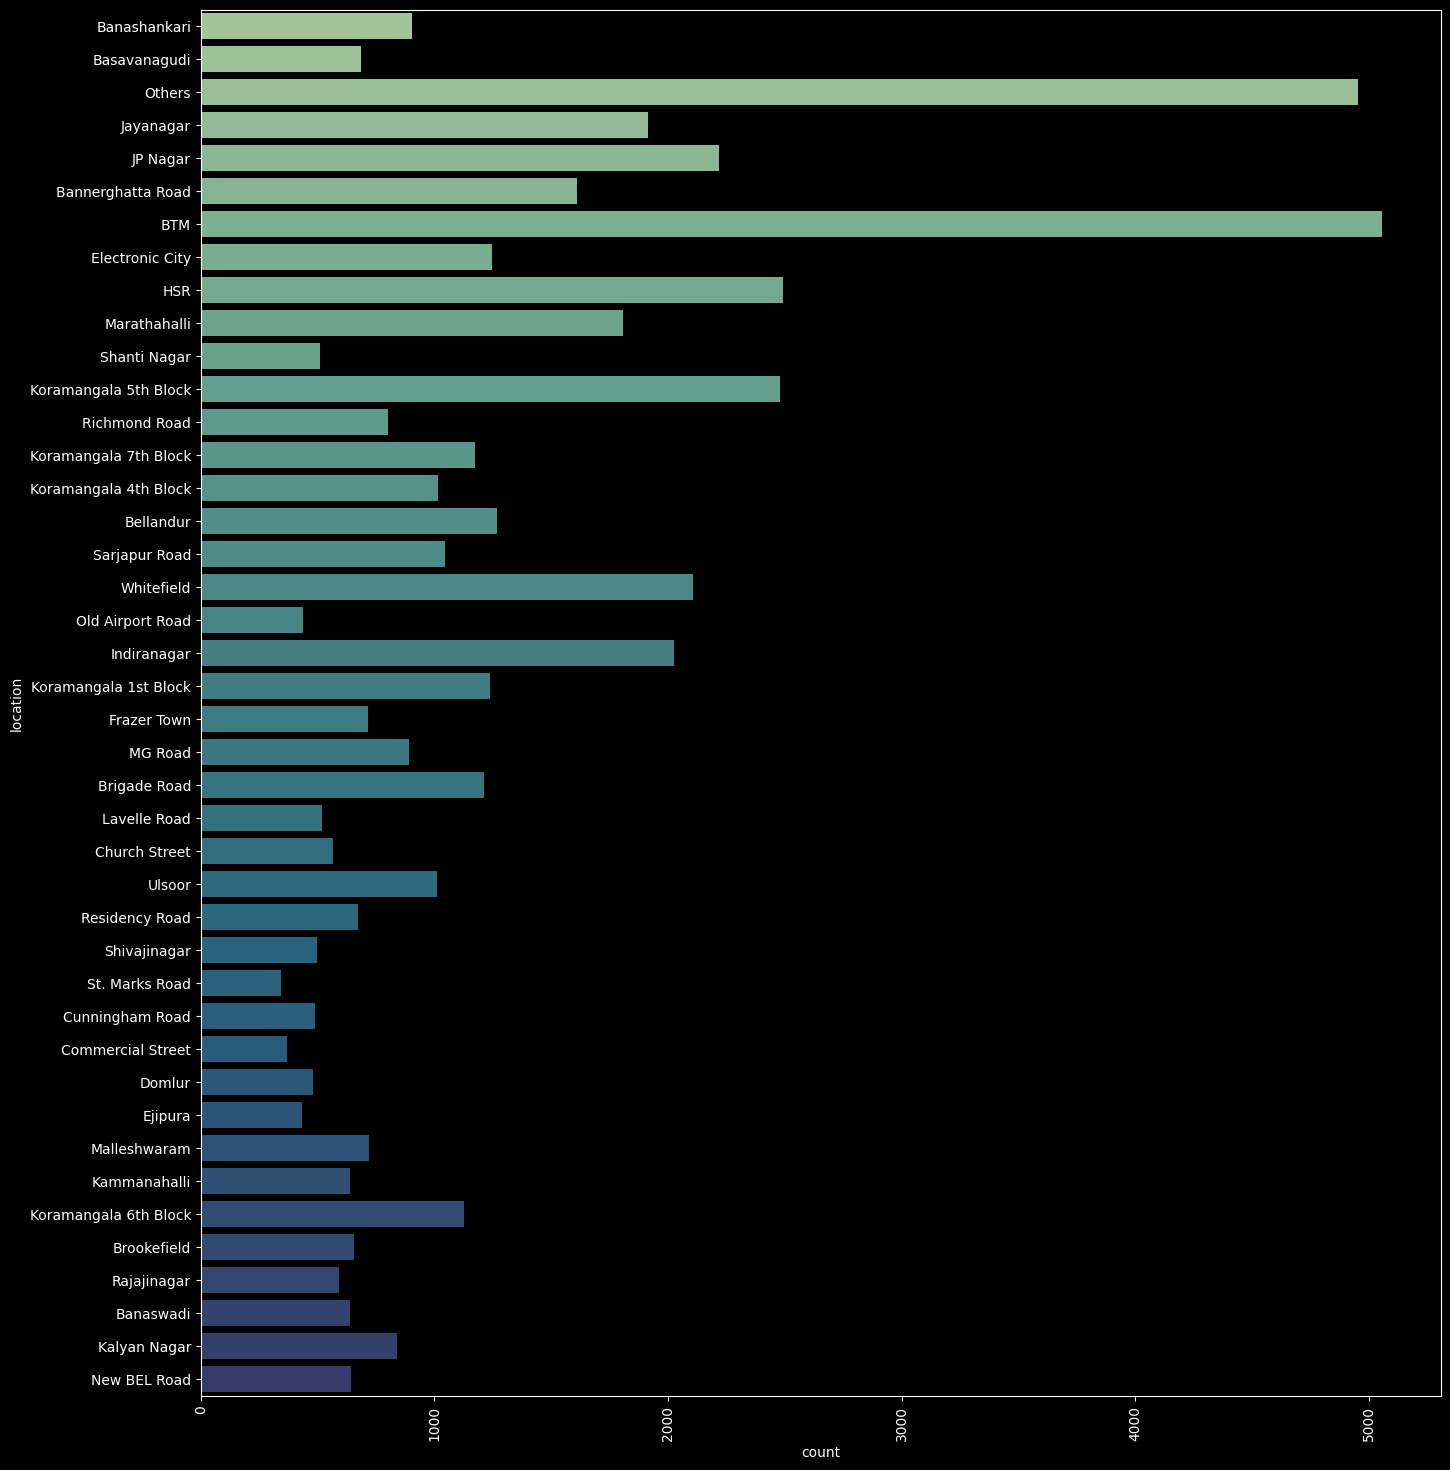

In [ ]:
#Countplot of various locations

plt.figure(figsize=(16,18))
sns.countplot(df['location'],palette='crest')
plt.xticks(rotation=90)

<ipython-input-205-911a84c54267>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'],palette='inferno')


<Axes: xlabel='online_order', ylabel='count'>

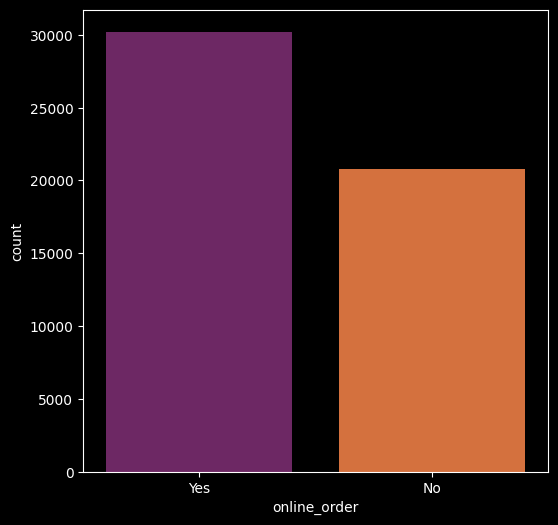

In [ ]:
#Visualizing online order

plt.figure(figsize=(6,6))
sns.countplot(x=df['online_order'],palette='inferno')

<ipython-input-206-49d20d53a10e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['book_table'],palette='rainbow')


<Axes: xlabel='book_table', ylabel='count'>

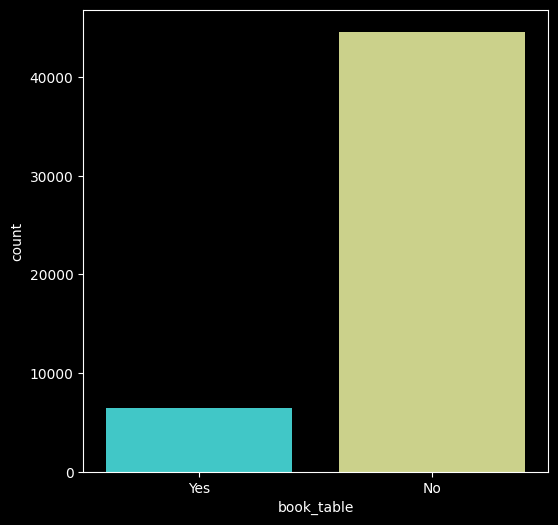

In [ ]:
#Visualizing Book table

plt.figure(figsize=(6,6))
sns.countplot(x=df['book_table'],palette='rainbow')

<Axes: xlabel='online_order', ylabel='rate'>

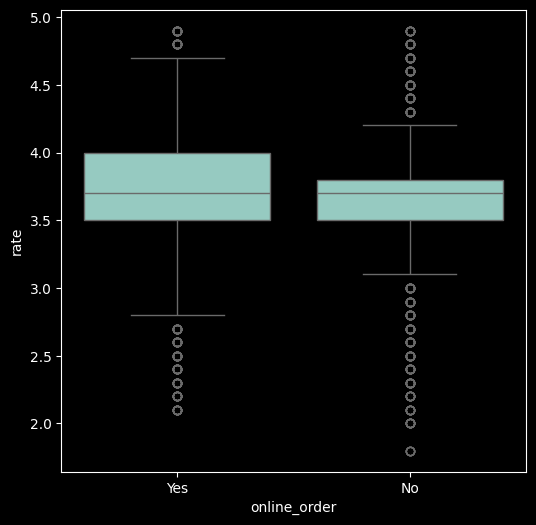

In [ ]:
#Visualizing Online order v/s Rate

plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

<Axes: xlabel='book_table', ylabel='rate'>

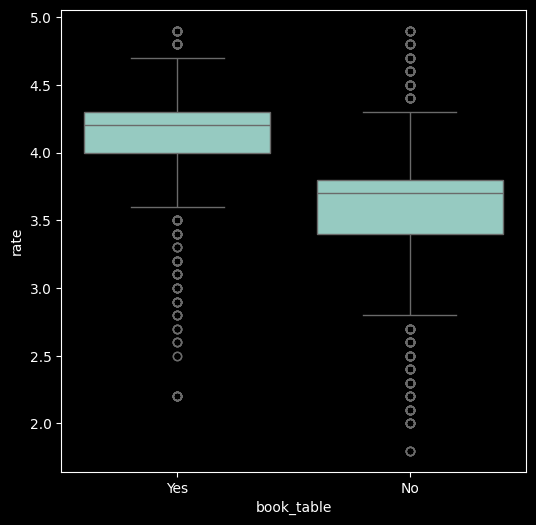

In [ ]:
#Visualizing Book table v/s rate

plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df)

In [ ]:
#Visualizing online order facility location wise

df1=df.groupby(['location','online_order'])['name'].count()
#df1
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Others                 2064  2890
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119

<Axes: xlabel='location'>

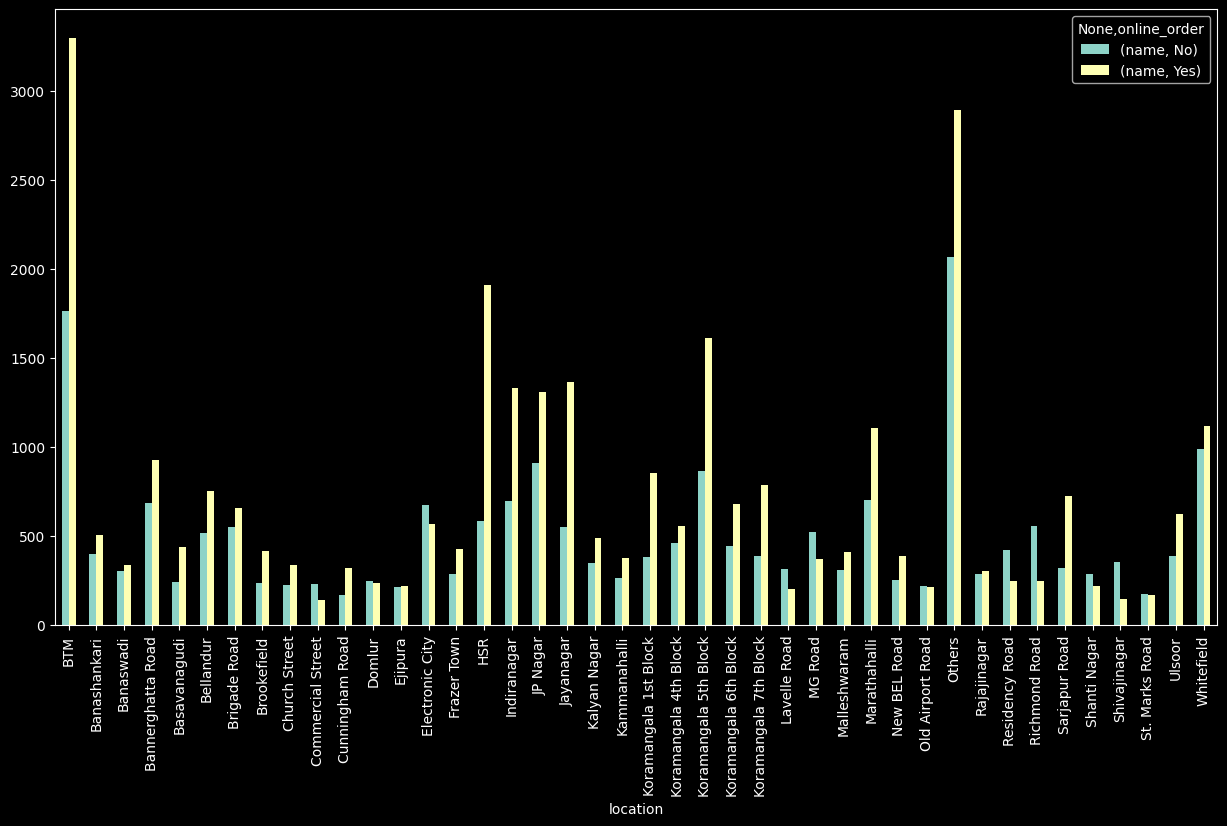

In [ ]:
df1.plot(kind='bar',figsize=(15,8))

In [ ]:
#Visualizing Book table facility location wise

df2=df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2=pd.read_csv('location_booktable.csv')
df2=pd.pivot_table(df2,values=None,index=['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Others                 4587  367
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253

<Axes: xlabel='location'>

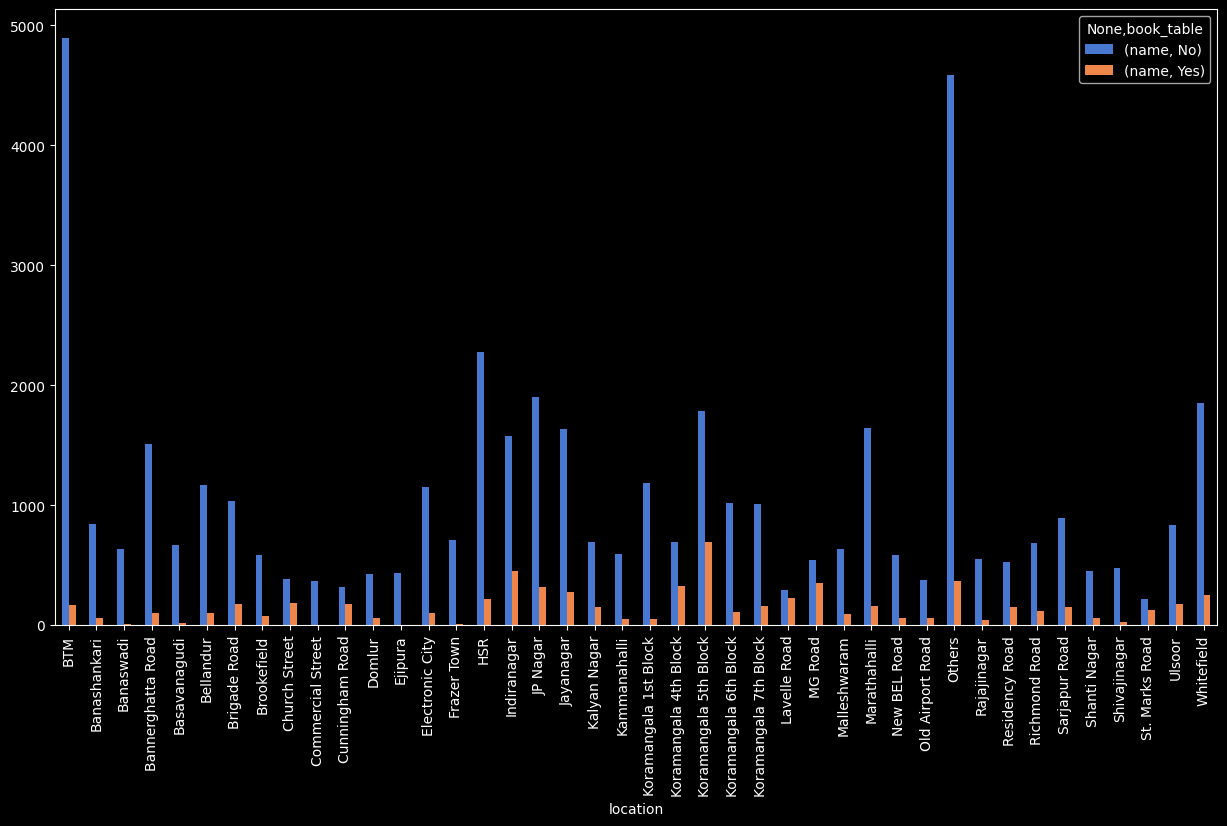

In [ ]:
df2.plot(kind='bar',figsize=(15,8),color=sns.color_palette('muted'))

<ipython-input-213-828bd91c5347>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type',y='rate',data=df,palette='dark')


<Axes: xlabel='Type', ylabel='rate'>

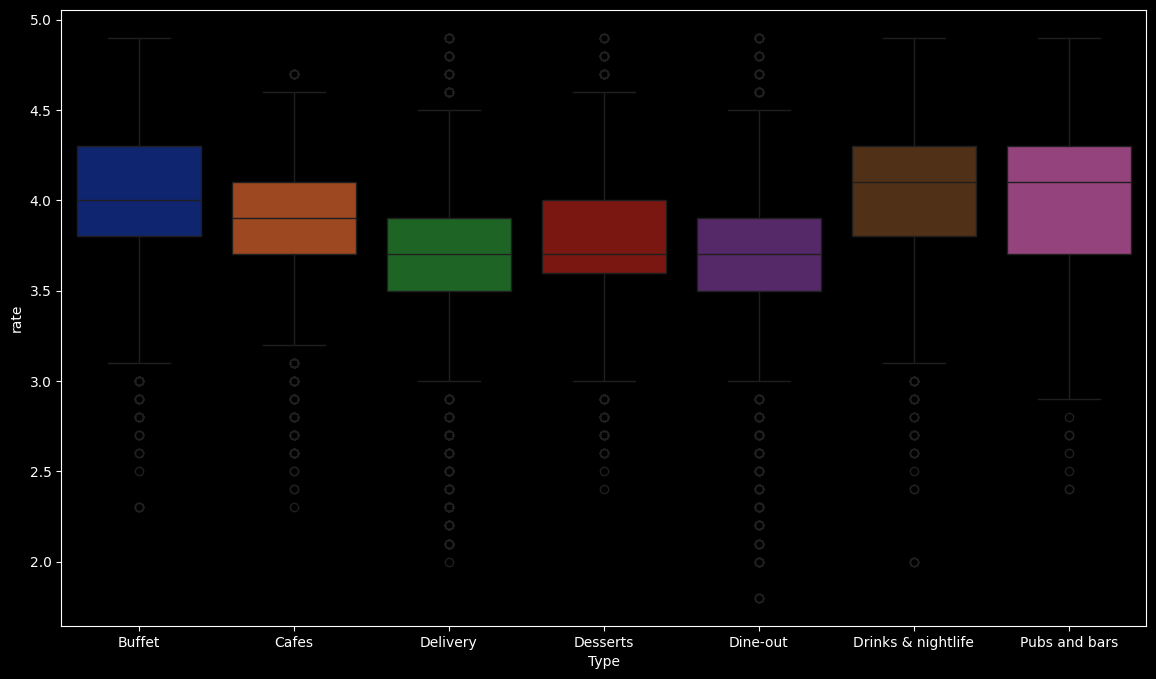

In [ ]:
#Visualizing Types of restaurants v/s Rate

plt.figure(figsize=(14,8))
sns.boxplot(x='Type',y='rate',data=df,palette='dark')

In [ ]:
#Grouping Types of restaurants location wise

df3=df.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3=pd.read_csv('location_Type.csv')
df3=pd.pivot_table(df3,values=None,index=['location'],columns=['Type'],fill_value=0,aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Others                    83   133     2787      276     1553   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<Axes: xlabel='location'>

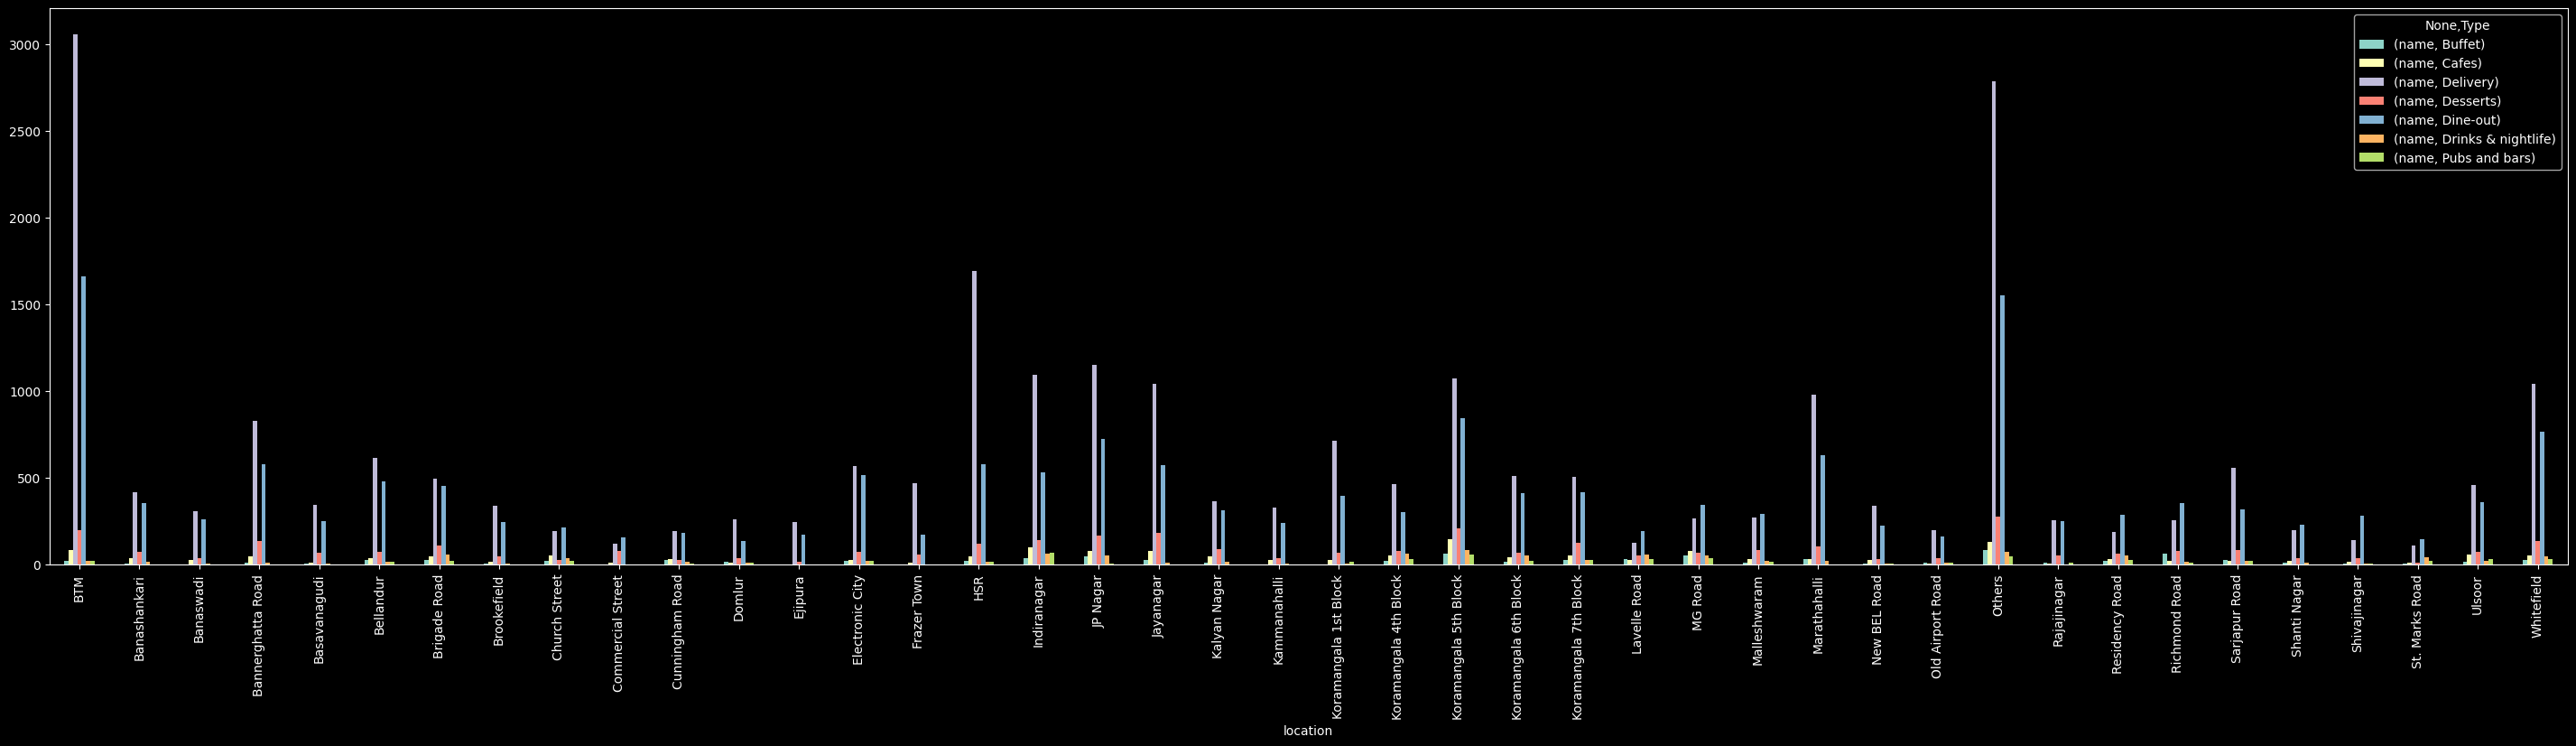

In [ ]:
df3.plot(kind='bar',figsize=(36,8))

In [ ]:
#No of votes location wise

df4=df[['location','votes']]
df4.drop_duplicates()
df5=df4.groupby(['location'])['votes'].sum()
df5=df5.to_frame()
df5=df5.sort_values('votes',ascending=True)
df5

,votes
location,
Shivajinagar,15668
Ejipura,17015
Commercial Street,25563
Banaswadi,34845
Shanti Nagar,55298
Rajajinagar,85274
Basavanagudi,94919
Domlur,96721
Frazer Town,97668


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Shivajinagar'),
  Text(1, 0, 'Ejipura'),
  Text(2, 0, 'Commercial Street'),
  Text(3, 0, 'Banaswadi'),
  Text(4, 0, 'Shanti Nagar'),
  Text(5, 0, 'Rajajinagar'),
  Text(6, 0, 'Basavanagudi'),
  Text(7, 0, 'Domlur'),
  Text(8, 0, 'Frazer Town'),
  Text(9, 0, 'Kammanahalli'),
  Text(10, 0, 'Electronic City'),
  Text(11, 0, 'Richmond Road'),
  Text(12, 0, 'Brookefield'),
  Text(13, 0, 'Old Airport Road'),
  Text(14, 0, 'Banashankari'),
  Text(15, 0, 'Kalyan Nagar'),
  Text(16, 0, 'New BEL Road'),
  Text(17, 0, 'Ulsoor'),
  Text(18, 0, 'Bellandur'),
  Text(19, 0, 'Bannerghatta Road'),
  Text(20, 0, 'Malleshwaram'),
  Text(21, 0, 'Koramangala 1st Block'),
  Text(22, 0, 'St. Marks Road'),
  Text(23, 0, 'Cunningham Road'),
  Text(24, 0, 'Re

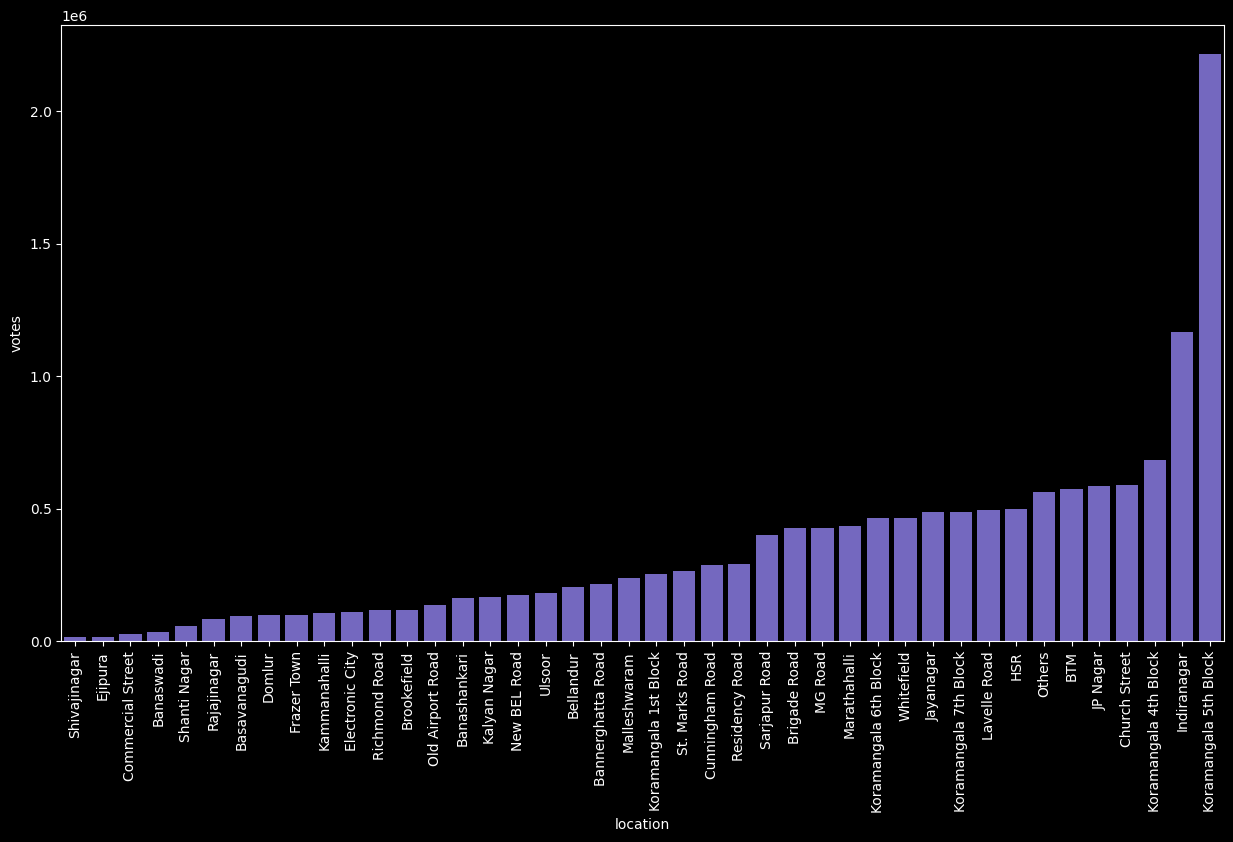

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df5['votes'],color='slateblue')
plt.xticks(rotation=90)

In [ ]:
#Visualizing top cuisines

df6=df[['cuisines','votes']]
df6.drop_duplicates()
df7=df6.groupby(['cuisines'])['votes'].sum()
df7=df7.to_frame()
df7=df7.sort_values('votes',ascending=False)
df7.head()

,votes
cuisines,
Others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [ ]:
#Removing 'others' from cuisines

df7=df7.iloc[1:,:]
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


<ipython-input-220-0877d981ab83>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df7['votes'],palette='rainbow')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68],
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),

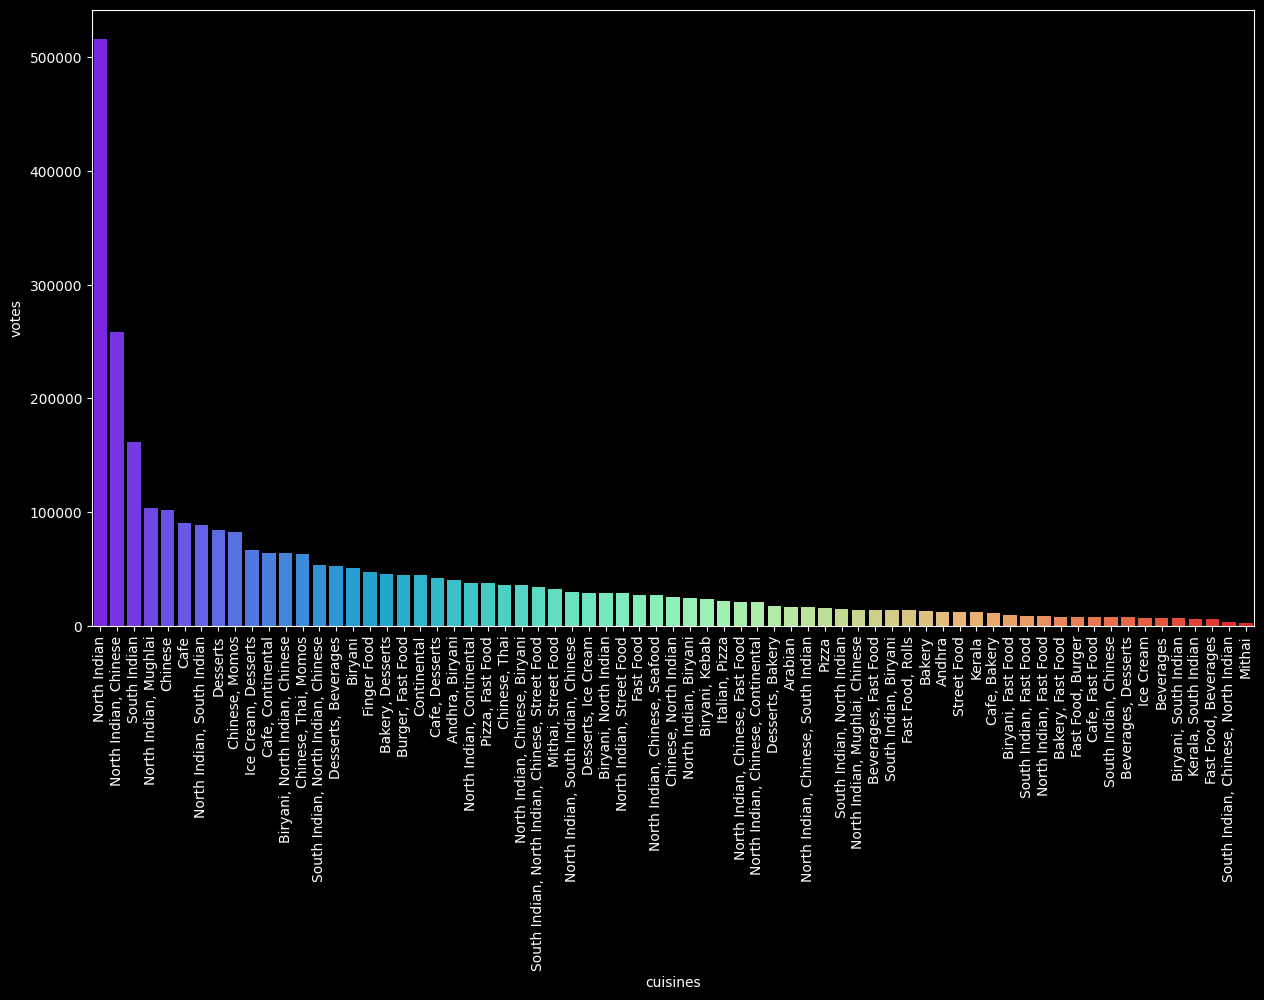

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df7['votes'],palette='rainbow')
plt.xticks(rotation=90)

In [ ]:
df.drop(['name'],axis=1,inplace=True)
df

,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.100000,787,Banashankari,Casual Dining,Others,800.0,Buffet,Banashankari
2,Yes,No,3.800000,918,Banashankari,Others,Others,800.0,Buffet,Banashankari
3,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.800000,166,Basavanagudi,Casual Dining,Others,600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.600000,27,Whitefield,Others,Continental,1500.0,Pubs and bars,Whitefield
51713,No,No,3.700142,0,Whitefield,Others,Finger Food,600.0,Pubs and bars,Whitefield
51714,No,No,3.700142,0,Whitefield,Others,Finger Food,2000.0,Pubs and bars,Whitefield
51715,No,Yes,4.300000,236,Others,Others,Finger Food,2500.0,Pubs and bars,Whitefield


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
df['online_order']= lb.fit_transform(df['online_order'])
df['book_table']= lb.fit_transform(df['book_table'])
df['location']= lb.fit_transform(df['location'])
df['rest_type']= lb.fit_transform(df['rest_type'])
df['cuisines']= lb.fit_transform(df['cuisines'])
df['Type']= lb.fit_transform(df['Type'])
df['listed_in(city)']= lb.fit_transform(df['listed_in(city)'])
df.dtypes

online_order         int64
book_table           int64
rate               float64
votes                int64
location             int64
rest_type            int64
cuisines             int64
Cost2plates        float64
Type                 int64
listed_in(city)      int64
dtype: object

In [ ]:
# x=df.drop(['rate'],axis=1)
# x

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,1,1,775,1,2,54,800.0,0,1
1,1,0,787,1,2,58,800.0,0,1
2,1,0,918,1,6,58,800.0,0,1
3,0,0,88,1,7,66,300.0,0,1
4,0,0,166,4,2,58,600.0,0,1
...,...,...,...,...,...,...,...,...,...
51712,0,0,27,41,6,26,1500.0,6,29
51713,0,0,0,41,6,35,600.0,6,29
51714,0,0,0,41,6,35,2000.0,6,29
51715,0,1,236,32,6,35,2500.0,6,29


In [ ]:
# y=df['rate']
# y

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.700142
51714    3.700142
51715    4.300000
51716    3.400000
Name: rate, Length: 51042, dtype: float64

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.03,random_state=42)
# x_train

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
10927,1,0,120,15,2,58,600.0,4,0
49878,1,0,545,5,7,45,300.0,4,28
27519,1,1,535,15,2,58,900.0,2,16
15673,0,0,0,2,7,58,300.0,4,9
31675,1,1,1879,0,1,58,900.0,4,17
...,...,...,...,...,...,...,...,...,...
11396,0,0,0,18,7,58,200.0,4,0
45285,0,0,0,31,7,9,150.0,2,25
38621,0,0,1597,6,3,61,1500.0,4,20
864,1,1,1964,3,2,58,1000.0,0,2


In [ ]:
# x_test

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
12910,1,0,6,27,7,58,400.0,4,7
41867,0,0,0,29,7,58,350.0,4,23
8860,1,0,4,24,7,58,350.0,2,0
44561,1,0,15,30,6,58,300.0,4,24
43900,0,1,227,27,6,58,1000.0,6,21
...,...,...,...,...,...,...,...,...,...
17035,1,1,803,15,1,58,700.0,4,10
28089,1,0,0,21,8,52,450.0,2,16
33215,1,0,0,15,4,43,800.0,2,18
12015,0,0,33,37,4,4,350.0,2,7


In [ ]:
# y_train

10927    3.800000
49878    4.000000
27519    3.900000
15673    3.700142
31675    4.500000
           ...   
11396    3.700142
45285    3.700142
38621    4.500000
864      4.200000
15971    4.000000
Name: rate, Length: 49510, dtype: float64

In [ ]:
# y_test

12910    3.500000
41867    3.700142
8860     3.300000
44561    3.500000
43900    4.200000
           ...   
17035    4.000000
28089    3.700142
33215    3.700142
12015    3.800000
30284    3.000000
Name: rate, Length: 1532, dtype: float64

In [ ]:
# from sklearn.linear_model import LinearRegression
# model=LinearRegression()
# model.fit(x_train,y_train)
# y_pred=model.predict(x_test)
# y_pred

array([3.62949102, 3.57433153, 3.63350606, ..., 3.67382234, 3.60935658,
       3.56049349])

In [ ]:
# df1=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Error':y_test-y_pred})
# df1

,Actual value,Predicted value,Error
12910,3.500000,3.629491,-0.129491
41867,3.700142,3.574332,0.125810
8860,3.300000,3.633506,-0.333506
44561,3.500000,3.622254,-0.122254
43900,4.200000,3.927029,0.272971
...,...,...,...
17035,4.000000,4.045328,-0.045328
28089,3.700142,3.629093,0.071049
33215,3.700142,3.673822,0.026320
12015,3.800000,3.609357,0.190643


In [ ]:
# from sklearn.metrics import mean_absolute_percentage_error
# print("The Mean Absolute percetange Error is",mean_absolute_percentage_error(y_test,y_pred))

The Mean Absolute percetange Error is 0.07229587929124551


In [ ]:
# from sklearn.metrics import r2_score
# print("The R2 score is",r2_score(y_test,y_pred))

The R2 score is 0.26290803272885677


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
# RF_Model.fit(x_train,y_train)
# y_predict=RF_Model.predict(x_test)
# r2_score(y_test,y_predict)

0.8405615635373536

In [ ]:
# #Preparing Extra Tree Regression
# from sklearn.ensemble import  ExtraTreesRegressor
# ET_Model=ExtraTreesRegressor(n_estimators = 120)
# ET_Model.fit(x_train,y_train)
# y_predict=ET_Model.predict(x_test)
# r2_score(y_test,y_predict)

0.9336323328433391

In [ ]:
# #Use pickle to save our model so that we can use it later

# import pickle
# # Saving model to disk
# pickle.dump(ET_Model, open('model.pkl','wb'))
# model=pickle.load(open('model.pkl','rb'))

In [ ]:
# from sklearn import metrics

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

In [ ]:
# y_predict.shape

In [ ]:
# df.hist(figsize=(12,8),bins=20)
# plt.show()